In [5]:
import pandas as pd
import math

In [9]:
# Create a placeholder DataFrame structure for transformed beta estimates
beta_estimates = pd.DataFrame(columns=["Parameter", "Logit_Estimate", "Lower_CI", "Upper_CI"])

# Function to transform logit values to probability scale
def logit_to_prob(logit):
    return 1 / (1 + math.exp(-logit))

# Assuming we have extracted the fixed effect estimates from the R model
# Replace these values with actual extracted estimates from R
r_model_estimates = {
    "Intercept": {"Estimate": 0.63, "Lower_CI": 0.56, "Upper_CI": 0.71},
    "Agent_Type_Congruent_vs_Acontextual": {"Estimate": 0.03, "Lower_CI": -0.05, "Upper_CI": 0.10},
    "Agent_Type_Incongruent_vs_Acontextual": {"Estimate": 0.28, "Lower_CI": 0.20, "Upper_CI": 0.36}
}

# Recreate the DataFrame using pandas' recommended `concat` method instead of `append`
beta_estimates_list = []

# Convert logit estimates to probability scale and store in a list
for param, values in r_model_estimates.items():
    prob_estimate = logit_to_prob(values["Estimate"])
    lower_prob = logit_to_prob(values["Lower_CI"])
    upper_prob = logit_to_prob(values["Upper_CI"])

    beta_estimates_list.append({
        "Parameter": param,
        "Logit_Estimate": values["Estimate"],
        "Lower_CI": values["Lower_CI"],
        "Upper_CI": values["Upper_CI"],
        "Probability_Estimate": prob_estimate,
        "Lower_Probability_CI": lower_prob,
        "Upper_Probability_CI": upper_prob
    })

# Convert list to DataFrame
beta_estimates = pd.DataFrame(beta_estimates_list)

# Save DataFrame as a CSV file for import into Python
#csv_path = "/mnt/data/beta_estimates.csv"
#beta_estimates.to_csv(csv_path, index=False)

# Filter out the Intercept from the DataFrame
beta_estimates_filtered = beta_estimates[beta_estimates["Parameter"] != "Intercept"]


/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_43201/2796568226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beta_estimates_filtered["Parameter"] = beta_estimates_filtered["Parameter"].replace({


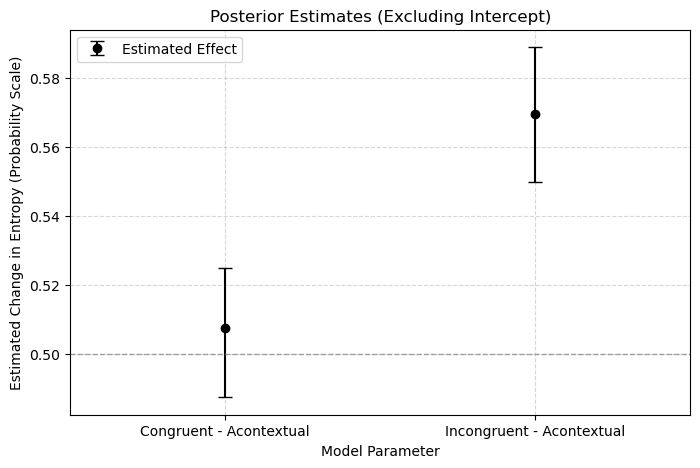

In [25]:
# Adjust the x-axis limits to add some padding around the points
# Rename parameters for better readability
beta_estimates_filtered["Parameter"] = beta_estimates_filtered["Parameter"].replace({
    "Agent_Type_Congruent_vs_Acontextual": "Congruent - Acontextual",
    "Agent_Type_Incongruent_vs_Acontextual": "Incongruent - Acontextual"
})

plt.figure(figsize=(8, 5))

# Define x positions for plotting
x_positions = np.arange(len(beta_estimates_filtered))

# Plot error bars for credible intervals
plt.errorbar(x_positions, beta_estimates_filtered["Probability_Estimate"],
             yerr=[beta_estimates_filtered["Probability_Estimate"] - beta_estimates_filtered["Lower_Probability_CI"],
                   beta_estimates_filtered["Upper_Probability_CI"] - beta_estimates_filtered["Probability_Estimate"]],
             fmt='o', color='black', capsize=5, label="Estimated Effect")

# Set x-axis ticks and labels, centering them properly
plt.xticks(x_positions, beta_estimates_filtered["Parameter"],  ha='center')

# Adjust x-axis limits to provide more spacing around extreme points
plt.xlim(-0.5, len(beta_estimates_filtered) - 0.5)

# Add plot details
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1, alpha=0.7)  # Reference line at 0.5
plt.xlabel("Model Parameter")
plt.ylabel(  
plt.title("Posterior Estimates (Excluding Intercept)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()
